In [76]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [77]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, msubs
from IPython.display import Image
from IPython.core.display import HTML
import scipy.integrate
import math
from numpy.linalg import matrix_power
from scipy.linalg import expm

%matplotlib notebook

In [78]:
def discretize_ss(A, B, dt):
    A_B = np.block([[A, B],
                [np.zeros((B.shape[1], A.shape[0])), np.zeros((B.shape[1], B.shape[1]))]])
    #print("A shape:", A.shape)
    #print("B shape:", B.shape)
    #print("A_B:", A_B)

    eAt_d = scipy.linalg.expm(A_B * dt)

    A_d_temp = eAt_d[:A.shape[0], :A.shape[0]]

    B_d_temp = eAt_d[:B.shape[0], A.shape[0]:]

    return (A_d_temp, B_d_temp)

In [79]:
def get_integrated_position_trajectory(initial_pos, vel_desired):
    x_ref_temp = np.zeros((n, N))

    pos_desired = initial_pos
    for i in range(0, N):
        pos_desired += vel_desired * dt
        x_ref_temp[:, i] = np.array([0, 0, 0, 0, pos_desired, 1, 0, 0, 0, 0, vel_desired, 0, -9.81])
        
    return x_ref_temp

P_cols: 781
Minimum possible Force in X and Y direction: -500.0
Maximum possible Force in X and Y direction: 500.0
Entering main MPC loop...
[0.] [0.] [0.]
[-7.61466666e-28] [-7.96238075e-16] [2.83706575e-29]
[-2.45878259e-25] [-4.4408921e-16] [4.44576838e-26]
[-2.16646668e-24] [3.81639165e-17] [3.89293774e-25]
[-5.80083324e-26] [-6.38378239e-16] [5.30420092e-27]
[-5.77131441e-25] [-4.30211422e-16] [9.87705401e-26]
[1.94640278e-25] [-7.00828284e-16] [-8.31153232e-26]
[-5.52726697e-25] [-1.52655666e-16] [9.28254432e-26]
[1.75542923e-24] [-8.11850587e-16] [-5.16221252e-25]
[3.56217012e-21] [-1.66533454e-16] [-2.63642969e-25]
[-2.20319186e-24] [9.71445147e-17] [3.92725579e-25]
[3.69003307e-25] [-2.63677968e-16] [-6.39128965e-26]
[3.79919689e-24] [4.85722573e-16] [-6.84777518e-25]
[-4.73542838e-24] [5.13478149e-16] [8.66302166e-25]
[-1.25936997e-24] [-1.33226763e-15] [2.58022757e-25]
[-3.04964308e-24] [3.33066907e-16] [8.59065733e-25]
[-1.29017558e-33] [9.99200722e-16] [7.46871612e-31]
[9.

[2.73259071e-24] [-1.11022302e-16] [-5.10958289e-25]
[1.15679884e-24] [-9.71445147e-17] [-2.00970395e-25]
[-3.50082593e-24] [-3.46944695e-16] [6.31272798e-25]
[2.90872953e-24] [-6.9388939e-17] [-5.24789353e-25]
[-5.16064487e-25] [-1.94289029e-16] [1.05542926e-25]
[1.11174526e-24] [-3.46944695e-16] [-2.09186889e-25]
[-2.28948993e-24] [6.10622664e-16] [4.1333641e-25]
[2.13509929e-31] [-3.60822483e-16] [1.89954433e-31]
[1.05241727e-31] [-1.0269563e-15] [-4.0128744e-32]
[1.3671302e-32] [-1.42941214e-15] [2.63690654e-31]
[1.7463003e-31] [7.77156117e-16] [-6.7975641e-31]
[2.34568158e-31] [1.52655666e-16] [2.14725578e-31]
[-8.74895995e-32] [7.07767178e-16] [1.16895371e-30]
[5.27035243e-33] [7.07767178e-16] [-1.94488832e-31]
[-6.72677112e-32] [2.22044605e-16] [5.82563339e-31]
[1.96121358e-32] [2.28983499e-16] [2.31996505e-31]
[-1.06104728e-31] [1.5959456e-16] [-3.08446332e-31]
[2.40674475e-32] [2.91433544e-16] [-2.14523957e-31]
[1.27433932e-31] [7.00828284e-16] [-2.14248798e-31]
[-2.40827759e-

[-1.18413753e-31] [2.25514052e-17] [-3.90834568e-31]
[1.20831462e-31] [2.72351586e-16] [2.42090899e-31]
[2.3219775e-31] [3.38271078e-17] [-4.49849651e-31]
[-2.82758207e-31] [5.17381277e-16] [-1.53368911e-31]
[-2.3262563e-32] [-1.21539064e-16] [-5.9213318e-32]
[1.00049616e-31] [6.78276879e-16] [9.82139636e-32]
[4.23648164e-34] [7.3378803e-16] [5.30450383e-31]
[9.31271764e-32] [2.46330734e-16] [7.44908701e-31]
[2.22484969e-31] [7.59808882e-16] [5.28132497e-31]
[-3.15070854e-31] [6.0368377e-16] [4.80985957e-32]
[-1.87272895e-31] [5.06539255e-16] [3.70602336e-31]
[-5.95022075e-32] [2.42861287e-16] [-4.27538392e-31]
[-5.63160656e-26] [-1.04083409e-16] [1.10928181e-26]
[3.78562591e-25] [-2.22044605e-16] [-7.30329935e-26]
[1.10880998e-24] [-2.02962647e-16] [-2.08574836e-25]
[1.37996504e-24] [-1.47451495e-16] [-2.58636218e-25]
[2.56534031e-24] [-3.5925039e-16] [-4.86076919e-25]
[-1.35687017e-24] [-1.61329283e-16] [2.46105265e-25]
[2.63454124e-24] [-2.58473798e-16] [-5.05414483e-25]
[3.99186328

[-1.28308312e-31] [7.56339436e-16] [4.25884801e-31]
[7.82254815e-32] [1.66533454e-16] [8.43749156e-32]
[3.65556786e-25] [-2.56739074e-16] [-6.90866189e-26]
[-2.33659896e-24] [-6.9388939e-17] [4.18310572e-25]
[-3.69044911e-25] [-3.57353036e-16] [6.51651166e-26]
[-1.36841618e-24] [-1.87350135e-16] [2.63387216e-25]
[-6.21593423e-25] [-6.71771666e-16] [1.2215307e-25]
[2.77899731e-24] [-8.87636319e-16] [-5.33231734e-25]
[4.35554192e-24] [-1.40078921e-16] [-8.36531804e-25]
[4.96518588e-25] [-4.06792655e-16] [-9.08805852e-26]
[5.29118678e-26] [-4.59701721e-16] [-1.3047016e-26]
[2.1882124e-24] [-1.5959456e-16] [-4.09208007e-25]
[-6.5434756e-25] [-2.25514052e-16] [1.28139844e-25]
[4.14982982e-24] [-6.62664368e-16] [-8.10235401e-25]
[-7.22718196e-25] [-4.51028104e-16] [1.42020909e-25]
[-8.89751949e-25] [-1.45716772e-16] [1.63058457e-25]
[6.27103462e-25] [-3.33066907e-16] [-1.15245321e-25]
[-5.69371848e-33] [9.02056208e-17] [-6.80487097e-31]
[-3.78399719e-31] [2.8449465e-16] [-1.78119556e-31]
[-1

<IPython.core.display.Javascript object>


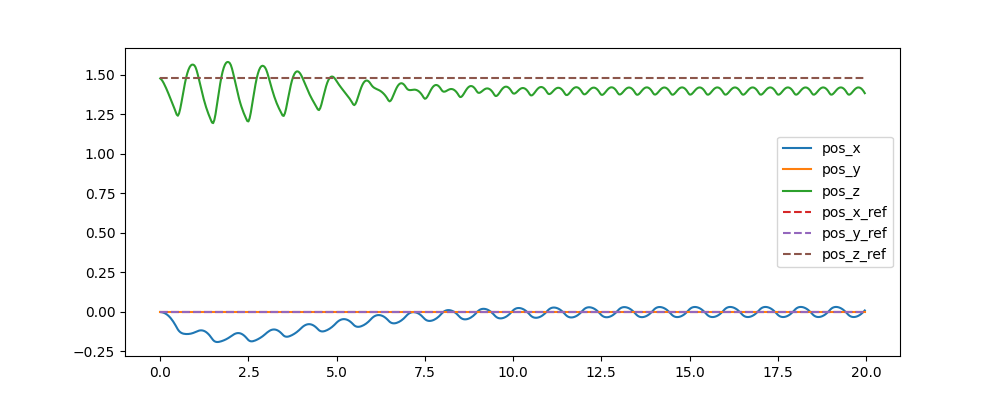

<IPython.core.display.Javascript object>


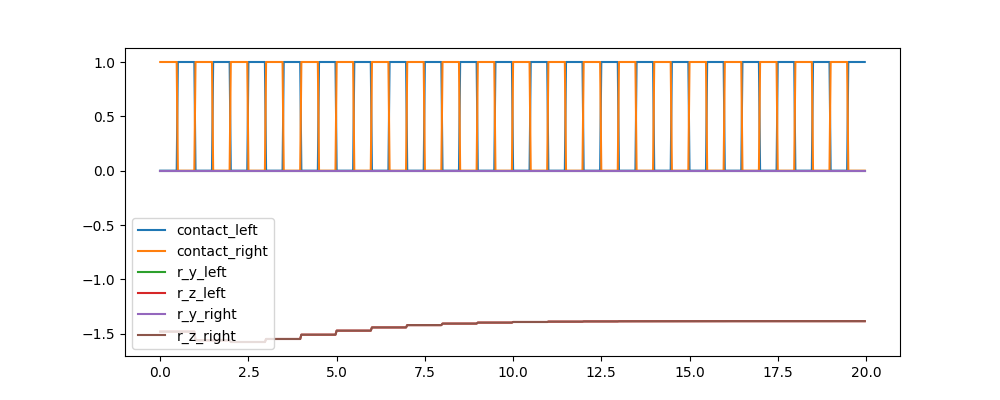

<IPython.core.display.Javascript object>


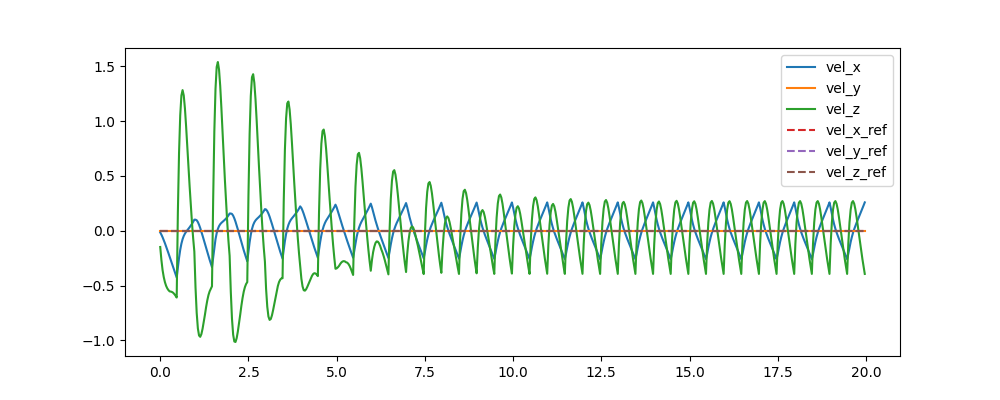

<IPython.core.display.Javascript object>


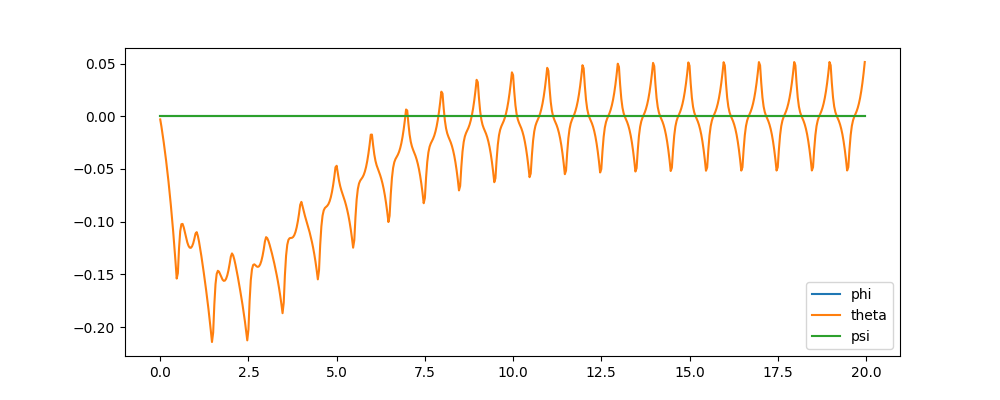

<IPython.core.display.Javascript object>


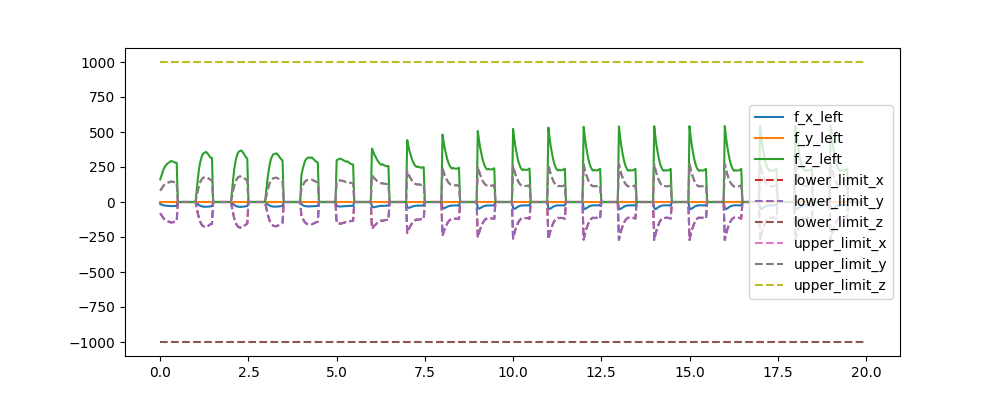

<IPython.core.display.Javascript object>


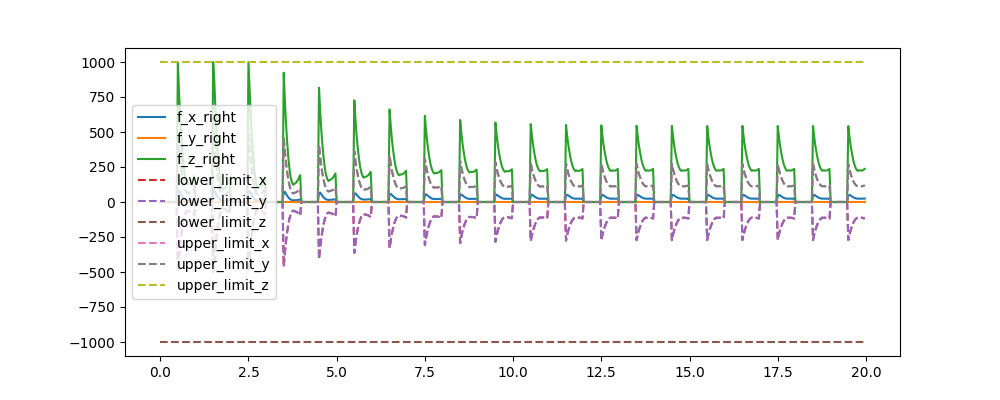

<IPython.core.display.Javascript object>


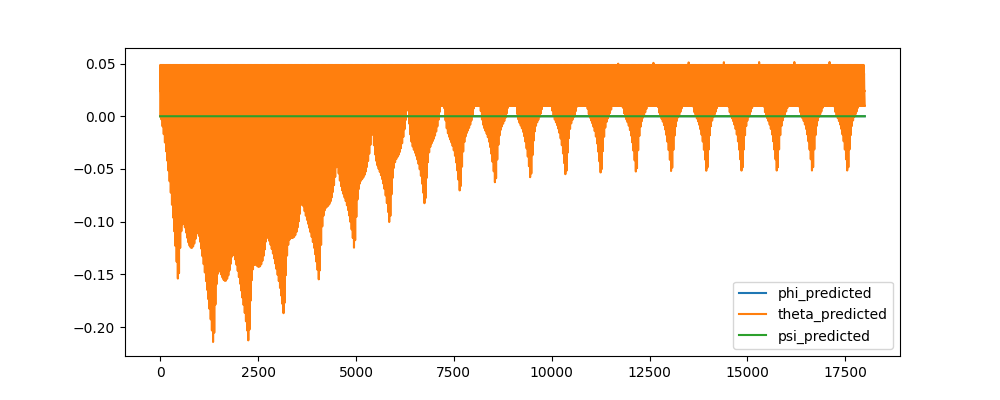

<IPython.core.display.Javascript object>


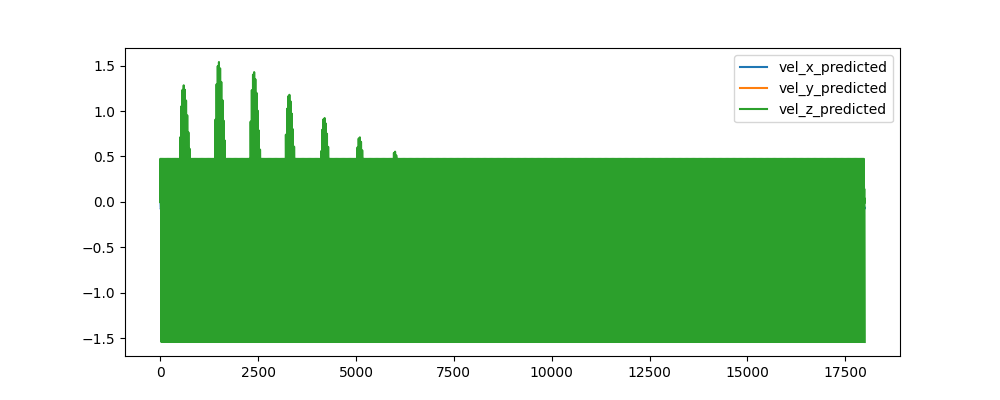

In [110]:
# MPC for full point mass model #######################################################
from casadi import *

dt = 1/30 # [s] (sampling time interval)
N = 30 # Prediction horizon Length

f_min = -1000 # Minimum Force 
f_max = 1000 # Maximum Force. Replace with max force in x, z, and z

phi = SX.sym('phi') # Orientation Euler Angle 1
theta = SX.sym('theta') # Orientation Euler Angle 2
psi = SX.sym('psi') # Orientatoin Euler Angle 3

omega_x = SX.sym('omega_x')
omega_y = SX.sym('omega_y')
omega_z = SX.sym('omega_z')

p_x = SX.sym('p_x') # position X
p_y = SX.sym('p_y') # position Y
p_z = SX.sym('p_z') # position Z

v_x = SX.sym('v_x') # velocity X
v_y = SX.sym('v_y') # velocity Y
v_z = SX.sym('v_z') # velocity Z

g_constant = SX.sym('g') # gravity state / constant (is augmented to allow state space form), might be seperated again for readability

states = [phi, theta, psi, p_x, p_y, p_z, omega_x, omega_y, omega_z, v_x, v_y, v_z, g_constant]
n = len(states)

f_x_l = SX.sym('f_x_l') # Force in X on left foot
f_y_l = SX.sym('f_y_l') # Force in Y on left foot
f_z_l = SX.sym('f_z_l') # Force in Z on left foot

f_x_r = SX.sym('f_x_r') # Force in X on right foot
f_y_r = SX.sym('f_y_r') # Force in Y on right foot
f_z_r = SX.sym('f_z_r') # Force in Z on right foot

controls = [f_x_l, f_y_l, f_z_l, f_x_r, f_y_r, f_z_r]
m = len(controls)

U = SX.sym('U', m, N) # Control action matrix (that will be determined by the NLP solver)
X = SX.sym('X', n, N + 1) # State Matrix (that will also be determined by the NLP solver due to the chosen multiple-shooting method). The + 1 is for x0
P_rows = n
P_cols = 1 + N + n * N + m * N + N * m # last N* m for D matrix at each time step (used for contact constraint, passing D for every timestep allows to inform MPC about future contacts), REDUCE DIMENSIONALITY BY STATING CONTACT AS 1 OR 0!!!
print("P_cols:", P_cols)
P = SX.sym('P', P_rows, P_cols) # Parameter Matrix containing states and reference states. n + n to have n elements for the initial state and n elements for the reference state.

#print("U shape after init:", U.shape)
#print("X shape after init:", X.shape)

objective_function = 0 # expression for the objective function

# lbx = lower bounds on optimization variable(s)
# ubx = upper bounds on optimization variable(s)
# lbg = lower bounds on constraints vector (should also be a vector), for equality constraints, just set lbg=ubg=k, where k is the constraint value
# ubg = upper bounds on constraints vector (should also be a vector)

lbx = []
ubx = []
lbg = []
ubg = []

g = [] # Constraint vector (both equality and inequality)

g += [X[:, 0] - P[:, 0]] # equality constraint x0 (chosen by solver) - x0 (input as parameter by user) = 0

lbg += [0] * n # n zeroes for equality constraints. These exist to ensure solver and actual initial state are the same.
ubg += [0] * n # n zeroes for equality constraints. These exist to ensure solver and actual initial state are the same.

#print("lbg length after initial state constraint:", len(lbg))

#Proven to be reasonbly stable:
#Q = np.diag([1000,1000,1000,10000,10000,50000,10,10,10,10,10,10,0])
#R = np.diag([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

Q = np.diag([1000,1000,1000,50000,50000,50000,10,10,10,10,10,10,0])

R = np.diag([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

t = 0

# state is phi, theta, psi, p_x, p_y, p_z, omega_x, omega_y, omega_z, v_x, v_y, v_z, gravity constant

x_t = [0, 0, 0, 0, 0, 1.48, 0, 0, 0, 0, 0, 0, -9.81]

state_history = []
reference_state_history = []
optimal_state_history = []
optimal_control_history = []
control_history = []
r_left_history = []
r_right_history = []
t_history = []

orientation_predicted_history = []
vel_predicted_history = []

contact_history = []

#x_ref = get_integrated_position_trajectory(x_t[5])

#x_ref = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -9.81]

#x_ref = np.tile(np.array(x_ref).reshape(n, 1), N)

x_ref = get_integrated_position_trajectory(x_t[4], 0.2)

m_value = 30 # kg

P_param = np.zeros((P_rows, P_cols))

P_param[:, 0] = np.array(x_t)
P_param[:, 1:N+1] = x_ref

swing_left = True
swing_right = False

#Diagonal ones where contact is not present. First 3 rows is left foot, second 3 rows is right foot
D = np.array([[int(swing_left == True), 0, 0, 0, 0, 0],
              [0, int(swing_left == True), 0, 0, 0, 0],
              [0, 0, int(swing_left == True), 0, 0, 0],
              [0, 0, 0, int(swing_right == True), 0, 0],
              [0, 0, 0, 0, int(swing_right == True), 0],
              [0, 0, 0, 0, 0, int(swing_right == True)]]) #Swing = no contact (and thus 1 any force == 0 must mean force is 0)

#contact_history.append([D[0, 0], D[3, 3]])

P_param[:m, 1+N+n*N + m*N:] = np.tile(D, N)

for i in range(N):
    #print("i:", i)
    
    state = X[:, i] # extract state at current time step
    control = U[:, i] # extract control input at current time step
    
    # Add the symbolic cost for each time step to the objective function 
    objective_function = objective_function + (state - P[:, i+1]).T @ Q @ (state - P[:, i+1]) + control.T @ R @ control
    
    #This is the equality constraint required for multiple shooting, so that the solver respects the system dynamics
    next_state = X[:, i+1]
    A_d_t = P[:, 1+N+(i*n):1+N+(i*n)+n]
    B_d_t = P[:, 1 + N + n*N +(i*m):1 + N + n*N + (i*m)+m]
    
    #print("A_d_t.shape:", A_d_t.shape)
    #print("B_d_t.shape:", B_d_t.shape)
    next_state_simulation = A_d_t @ state + B_d_t @ control
    #print("next_state_simulation:", next_state_simulation)
    #print("next state simulation type:", type(next_state_simulation))
    
    g += [next_state - next_state_simulation]
    
    lbg += [0] * n # n zeroes for equality constraints enforcing system dynamcis on every state
    ubg += [0] * n # n zeroes for equality constraints enforcing system dynamcis on every state
        

adjust_friction_constraints = True
mu = 0.5

adjust_contact_constraints_equality = True
adjust_contact_constraints_bounds = False

if adjust_contact_constraints_equality:

    for i in range(N): # Contact constraints.
        if i % m == 0:
            g += [P[:m, 1 + N + n*N + m*N + (i*m):1 + N + n*N + m*N + (i*m) + m] @ U[:, i]]
            lbg += [0] * m
            ubg += [0] * m

for i in range(N): # Friction cone constraints. Seperate loops to have a nice structure in constraints

    if adjust_friction_constraints:
        if i % m == 0:
            
            f_x_left = U[0, i]
            f_y_left = U[1, i]
            f_z_left = U[2, i]
            
            f_x_right = U[3, i]
            f_y_right = U[4, i]
            f_z_right = U[5, i]
            
            # -mu * f_z < f_x
            g += [-mu * f_z_left - f_x_left]
            lbg += [-inf]
            ubg += [0]
            
            # f_x < mu * f_z
            g += [f_x_left - mu * f_z_left]
            lbg += [-inf]
            ubg += [0]
            
            # -mu * f_z < f_y
            g += [-mu * f_z_left - f_y_left]
            lbg += [-inf]
            ubg += [0]
            
            # f_y < mu * f_z
            g += [f_y_left - mu * f_z_left]
            lbg += [-inf]
            ubg += [0]
            
            # -mu * f_z < f_x
            g += [-mu * f_z_right - f_x_right]
            lbg += [-inf]
            ubg += [0]
            
            # f_x < mu * f_z
            g += [f_x_right - mu * f_z_right]
            lbg += [-inf]
            ubg += [0]
            
            # -mu * f_z < f_y
            g += [-mu * f_z_right - f_y_right]
            lbg += [-inf]
            ubg += [0]
            
            # f_y < mu * f_z
            g += [f_y_right - mu * f_z_right]
            lbg += [-inf]
            ubg += [0]  
            
optimization_variables = [X.reshape((n * (N+1), 1)), U.reshape((m * N, 1))]

nlp = {'x':vertcat(*optimization_variables), 'f':objective_function, 'g':vertcat(*g), 'p':P}

opts = {}
opts["print_time"] = 0
#opts["expand"] = False
opts['ipopt'] = {"max_iter":50, "print_level":0, "acceptable_tol":1e-7, "acceptable_obj_change_tol":1e-5}

solver = nlpsol('solver', 'ipopt', nlp, opts);

# Initialization values for solver. These should be filled with at least a linear interpolation between initial and desired state to improve performance.
# They are updated every iteration.

U_t = np.zeros((m, N))
X_t = np.matlib.repmat(np.array(x_t).reshape(n,1), N+1, 1)#.reshape(n*(N+1), 1) # np.tile(np.array(x_t).reshape(n, 1), N+1)

#print("U_t shape after init:", U_t.shape)
#print("X_t shape after init:", X_t.shape)

simulation_time = 20 # [s]
    
iterations = 0

r_left_contact = True
r_right_contact = True

I_body = np.array([[0.836, 0., 0.],
                    [0., 1.2288, 0.],
                    [0., 0., 1.4843]]) # Inertia in the body frame (meaning around CoM of torso).

Ixx = I_body[0, 0]
Ixy = I_body[0, 1]
Ixz = I_body[0, 2]

Iyx = I_body[1, 0]
Iyy = I_body[1, 1]
Iyz = I_body[1, 2]

Izx = I_body[2, 0]
Izy = I_body[2, 1]
Izz = I_body[2, 2]

for i in range(0, n * (N+1) + m * N):
    
    # TODO: Add state constraints
    if i <= n * (N+1) - 1: # Loop is still inside the state decision variable region in the vector.
        lbx += [-inf]
        ubx += [inf]
    else:
        
        lbx += [f_min]
        ubx += [f_max]
        
if adjust_contact_constraints_bounds:

    for i in range(0, m * N):
        if i % m == 0 or i == n * (N+1):

            index = n * (N+1)

            if not r_left_contact:
                lbx[index] = ubx[index] = 0.
                lbx[index + 1] = ubx[index + 1] = 0.
                lbx[index + 2] = ubx[index + 2] = 0.

            if not r_right_contact:
                lbx[index + 3] = ubx[index + 3] = 0.
                lbx[index + 4] = ubx[index + 4] = 0.
                lbx[index + 5] = ubx[index + 5] = 0.
            
print("Minimum possible Force in X and Y direction:", mu * f_min)
print("Maximum possible Force in X and Y direction:", mu * f_max)

use_C_code = False

solver.generate_dependencies('nlp.c')

if use_C_code:

    print("Compiling C Code for solver...")

    solver.generate_dependencies('nlp.c')
    import os
    os.system("gcc -O2 -fPIC -shared nlp.c -o nlp.so")
    solver = nlpsol("solver", "ipopt", "nlp.so", opts)

    print("Finished compiling.")

#X_t = X_t.reshape((n * (N+1), 1))
U_t = U_t.reshape((m * N, 1))

print("Entering main MPC loop...")

foot_behind_left = not swing_left # this is because it will be inverted on the first contact switch
foot_behind_right = not swing_right

pos_desired = 0
vel_desired = 0

step_length = 0

r_y_left = r_y_right = 0

contact_swap_interval = 15

D_vector = np.zeros(((simulation_time * int(1/dt)*m) * 2, m)) # * 2 because I'm lazy, the MPC just needs future contacts, even at the last iteration so 
counter = 0
for i in range(D_vector.shape[0]):
    if i % m == 0:
        if counter % contact_swap_interval == 0:
            swing_left = not swing_left
            swing_right = not swing_right
            D_t = np.array([[int(swing_left == True), 0, 0, 0, 0, 0],
                            [0, int(swing_left == True), 0, 0, 0, 0],
                            [0, 0, int(swing_left == True), 0, 0, 0],
                            [0, 0, 0, int(swing_right == True), 0, 0],
                            [0, 0, 0, 0, int(swing_right == True), 0],
                            [0, 0, 0, 0, 0, int(swing_right == True)]]) # Swing = no contact (and thus 1 any force == 0 must mean force is 0)
        
        D_vector[i:i + m, :] = D_t
        counter += 1
        
x_t = np.array(x_t).reshape(n,1)

while t < simulation_time:
    # In C++: Update I_world based on rotation matrix angles -> Update A_d and B_d based on I world and r_l, r_r changes -> Pass A_d and B_d as parameters
    
    D_t = D_vector[iterations*m:iterations*m + m, :]
    P_param[:m, 1 + N + n*N + m*N:] = D_vector[iterations*m:iterations*m + N*m, :].T #np.tile(D_t, N)
    contact_history.append([P_param[:m, 1 + N + n*N + m*N:1 + N + n*N + m*N+m][0,0], P_param[:m, 1 + N + n*N + m*N:1 + N + n*N + m*N+m][3,3]])
    
    if iterations % (contact_swap_interval * 2) == 0:

        if foot_behind_left:
            r_y_left = -step_length
        else:
            r_y_left = step_length
        foot_behind_left = not foot_behind_left

        if foot_behind_right:
            r_y_right = -step_length
        else:
            r_y_right = step_length
        foot_behind_right = not foot_behind_right
                
        # Location of the force vector being applied by the left foot.
        r_x_left = 0.15
        #r_y_left = 0
        r_z_left = -x_t[5]

        # Location of the force vector being applied by the right foot.
        r_x_right = -0.15
        #r_y_right = 0
        r_z_right = -x_t[5]
        
    x_ref = np.zeros((n, N))
    
    pos_desired += vel_desired * dt
    
    for i in range(N):
        x_ref[:, i] = np.array([0, 0, 0, 0, pos_desired, 1.48, 0, 0, 0, 0, vel_desired, 0, -9.81])

    P_param[:, 1:N+1] = x_ref

    reference_state_history.append(x_ref[:, 0].reshape(n,1)) # or -1
    
    #print(x_t - X_t[n:n+n])
    
    for i in range(N):
        if i < N-1:
            phi_t = X_t[n*(i+1)+0]
            theta_t = X_t[n*(i+1)+1]
            psi_t = X_t[n*(i+1)+2]
            
            vel_x_t = X_t[n*(i+1)+9]
            vel_y_t = X_t[n*(i+1)+10]
            vel_z_t = X_t[n*(i+1)+11]
            
            pos_x_t = X_t[n*(i+1)+3]
            pos_y_t = X_t[n*(i+1)+4]
            pos_z_t = X_t[n*(i+1)+5]
        else:
            phi_t = X_t[n*(N-1)]
            theta_t = X_t[n*(N-1)+1]
            psi_t = X_t[n*(N-1)+2]
            
            vel_x_t = X_t[n*(N-1)+9]
            vel_y_t = X_t[n*(N-1)+10]
            vel_z_t = X_t[n*(N-1)+11]
            
            pos_x_t = X_t[n*(N-1)+3]
            pos_y_t = X_t[n*(N-1)+4]
            pos_z_t = X_t[n*(N-1)+5]
            
        if i == 0:
            phi_t = x_t[0]
            theta_t = x_t[1]
            psi_t = x_t[2]

            vel_x_t = x_t[9]
            vel_y_t = x_t[10]
            vel_z_t = x_t[11]

            pos_x_t = x_t[3]
            pos_y_t = x_t[4]
            pos_z_t = x_t[5]
                        
        #phi_t = x_ref[0, i]
        #theta_t = x_ref[1, i]
        #psi_t = x_ref[2, i]
        
        orientation_predicted_history.append([phi_t, theta_t, psi_t])
        
        #phi_t = theta_t = psi_t = 0
        
        vel_predicted_history.append([vel_x_t, vel_y_t, vel_z_t])
        
        #r_y_left -= (pos_y_t - )
        #r_y_right -= vel_y_t * dt

        I_world = np.array([[(Ixx*cos(psi_t) + Iyx*sin(psi_t))*cos(psi_t) + (Ixy*cos(psi_t) + Iyy*sin(psi_t))*sin(psi_t), -(Ixx*cos(psi_t) + Iyx*sin(psi_t))*sin(psi_t) + (Ixy*cos(psi_t) + Iyy*sin(psi_t))*cos(psi_t), Ixz*cos(psi_t) + Iyz*sin(psi_t)], [(-Ixx*sin(psi_t) + Iyx*cos(psi_t))*cos(psi_t) + (-Ixy*sin(psi_t) + Iyy*cos(psi_t))*sin(psi_t), -(-Ixx*sin(psi_t) + Iyx*cos(psi_t))*sin(psi_t) + (-Ixy*sin(psi_t) + Iyy*cos(psi_t))*cos(psi_t), -Ixz*sin(psi_t) + Iyz*cos(psi_t)], [Ixy*sin(psi_t) + Izx*cos(psi_t), Ixy*cos(psi_t) - Izx*sin(psi_t), Izz]])

        # Skew symmetric versions for the 3x1 foot position vector resembling the matrix version of the cross product of two vectors. This is needed for the matrix form.
        r_left_skew_symmetric = np.array([[0, -r_z_left, r_y_left],
                                        [r_z_left, 0, -r_x_left],
                                        [-r_y_left, r_x_left, 0]]) 

        r_right_skew_symmetric = np.array([[0, -r_z_right, r_y_right],
                                        [r_z_right, 0, -r_x_right],
                                        [-r_y_right, r_x_right, 0]])

        A_c = np.array([[0, 0, 0, 0, 0, 0, math.cos(psi_t), math.sin(psi_t), 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, -math.sin(psi_t), math.cos(psi_t), 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

        B_c = np.block([[0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [I_world @ r_left_skew_symmetric, I_world @ r_right_skew_symmetric],
                        [1/m_value, 0, 0, 1/m_value, 0, 0],
                        [0, 1/m_value, 0, 0, 1/m_value, 0],
                        [0, 0, 1/m_value, 0, 0, 1/m_value],
                        [0, 0, 0, 0, 0, 0]])

        A_d, B_d = discretize_ss(A_c, B_c, dt)
        
        P_param[:, 1 + N + (i*n):1 + N + (i*n)+n] = A_d
        P_param[:, 1 + N + n * N + (i*m):1 + N + n * N + (i*m)+m] = B_d
    
    x0_solver = vertcat(*[X_t, U_t])
    sol = solver(x0=x0_solver, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=DM(P_param))
    
    t_history.append(t)
    optimal_state_history.append(X_t)
    optimal_control_history.append(U_t)
    
    u_t = sol['x'][n * (N+1):n * (N+1) + m]
        
    phi_t = x_t[0]
    theta_t = x_t[1]
    psi_t = x_t[2]
    
    I_world = np.array([[(Ixx*cos(psi_t) + Iyx*sin(psi_t))*cos(psi_t) + (Ixy*cos(psi_t) + Iyy*sin(psi_t))*sin(psi_t), -(Ixx*cos(psi_t) + Iyx*sin(psi_t))*sin(psi_t) + (Ixy*cos(psi_t) + Iyy*sin(psi_t))*cos(psi_t), Ixz*cos(psi_t) + Iyz*sin(psi_t)], [(-Ixx*sin(psi_t) + Iyx*cos(psi_t))*cos(psi_t) + (-Ixy*sin(psi_t) + Iyy*cos(psi_t))*sin(psi_t), -(-Ixx*sin(psi_t) + Iyx*cos(psi_t))*sin(psi_t) + (-Ixy*sin(psi_t) + Iyy*cos(psi_t))*cos(psi_t), -Ixz*sin(psi_t) + Iyz*cos(psi_t)], [Ixy*sin(psi_t) + Izx*cos(psi_t), Ixy*cos(psi_t) - Izx*sin(psi_t), Izz]])
    
    #r has to be updated here in future as well!!!
    
    A_c = np.array([[0, 0, 0, 0, 0, 0, math.cos(psi_t), math.sin(psi_t), 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, -math.sin(psi_t), math.cos(psi_t), 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],

                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

    B_c = np.block([[0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [I_world @ r_left_skew_symmetric, I_world @ r_right_skew_symmetric],
                        [1/m_value, 0, 0, 1/m_value, 0, 0],
                        [0, 1/m_value, 0, 0, 1/m_value, 0],
                        [0, 0, 1/m_value, 0, 0, 1/m_value],
                        [0, 0, 0, 0, 0, 0]])
    
    A_d, B_d = discretize_ss(A_c, B_c, dt)
    
    x_t = A_d @ np.array(x_t).reshape(n,1) + B_d @ np.array(u_t).reshape(m,1)
    P_param[:, 0] = x_t.reshape(13)
    
    X_t[:-n] = sol['x'][n:n * (N+1)]
    X_t[-n:] = sol['x'][-n - m * N: n * (N+1)]
    
    U_t[:-m] = sol['x'][m + n * (N+1):]
    U_t[-m:] = sol['x'][-m:]
    
    state_history.append(x_t)
    control_history.append(np.array(u_t).reshape(m,1))
    r_left_history.append([r_x_left, r_y_left, r_z_left])
    r_right_history.append([r_x_right, r_y_right, r_z_right])

    t += dt
    iterations += 1
    
print("Final MPC iterations:", iterations)
print("Steady state error:\n", (x_ref[: ,-1].reshape(n,1) - x_t))
#print("Steady state error:", np.array(state_history[-1]) - np.array(x_ref))
#print("Test:", np.linalg.norm(np.array(x_t[0:3]).reshape(3,1) - np.array(x_ref[0:3]).reshape(3,1)))    

plt.rcParams['figure.figsize'] = [10, 4] #inches

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_history, [x[3] for x in state_history],label="pos_x")
ax.plot(t_history, [x[4] for x in state_history],label="pos_y")
ax.plot(t_history, [x[5] for x in state_history],label="pos_z")

t_history_interval = int(len(t_history) / int(len(t_history) / N)) # I know this is ugly, but who cares :)

ax.plot(t_history, [x[3][0] for x in reference_state_history], label="pos_x_ref", linestyle='--')
ax.plot(t_history, [x[4][0] for x in reference_state_history], label="pos_y_ref", linestyle='--')
ax.plot(t_history, [x[5][0] for x in reference_state_history], label="pos_z_ref", linestyle='--')
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_history, [x[0] for x in contact_history], label="contact_left")
ax.plot(t_history, [x[1] for x in contact_history], label="contact_right")

ax.plot(t_history, [x[1] for x in r_left_history], label="r_y_left")
ax.plot(t_history, [x[2] for x in r_left_history], label="r_z_left")

ax.plot(t_history, [x[1] for x in r_right_history], label="r_y_right")
ax.plot(t_history, [x[2] for x in r_right_history], label="r_z_right")
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_history, [x[9] for x in state_history],label="vel_x")
ax.plot(t_history, [x[10] for x in state_history],label="vel_y")
ax.plot(t_history, [x[11] for x in state_history],label="vel_z")

ax.plot(t_history, [x[9][0] for x in reference_state_history], label="vel_x_ref", linestyle='--')
ax.plot(t_history, [x[10][0] for x in reference_state_history], label="vel_y_ref", linestyle='--')
ax.plot(t_history, [x[11][0] for x in reference_state_history], label="vel_z_ref", linestyle='--')
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_history, [x[0] for x in state_history],label="phi")
ax.plot(t_history, [x[1] for x in state_history],label="theta")
ax.plot(t_history, [x[2] for x in state_history],label="psi")

#ax.plot(t_history[:t_history_interval:] * N, x_ref[0, :], label="phi_ref", linestyle='--')
#ax.plot(t_history[:t_history_interval:], x_ref[1, :], label="theta_ref", linestyle='--')
#ax.plot(t_history[:t_history_interval:], x_ref[2, :], label="psi_ref", linestyle='--')
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_history, [x[0] for x in control_history], label="f_x_left")
ax.plot(t_history, [x[1] for x in control_history], label="f_y_left")
ax.plot(t_history, [x[2] for x in control_history], label="f_z_left")

# no minus needed because f_min is already negative, maybe change that.
ax.plot(t_history, [-mu * f[2] for f in control_history], label="lower_limit_x", linestyle='--')
ax.plot(t_history, [-mu * f[2] for f in control_history], label="lower_limit_y", linestyle='--')
ax.plot(t_history, np.ones(len(t_history)) * f_min, label="lower_limit_z", linestyle='--')

ax.plot(t_history, [mu * f[2] for f in control_history], label="upper_limit_x", linestyle='--')
ax.plot(t_history, [mu * f[2] for f in control_history], label="upper_limit_y", linestyle='--')
ax.plot(t_history, np.ones(len(t_history)) * f_max, label="upper_limit_z", linestyle='--')
plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_history, [x[3] for x in control_history], label="f_x_right")
ax.plot(t_history, [x[4] for x in control_history], label="f_y_right")
ax.plot(t_history, [x[5] for x in control_history], label="f_z_right")

# no minus needed because f_min is already negative, maybe change that.

ax.plot(t_history, [-mu * f[5] for f in control_history], label="lower_limit_x", linestyle='--')
ax.plot(t_history, [-mu * f[5] for f in control_history], label="lower_limit_y", linestyle='--')
ax.plot(t_history, np.ones(len(t_history)) * f_min, label="lower_limit_z", linestyle='--')

ax.plot(t_history, [mu * f[5] for f in control_history], label="upper_limit_x", linestyle='--')
ax.plot(t_history, [mu * f[5] for f in control_history], label="upper_limit_y", linestyle='--')
ax.plot(t_history, np.ones(len(t_history)) * f_max, label="upper_limit_z", linestyle='--')
plt.legend()

plot_optimal_state_history = True

if plot_optimal_state_history:

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.plot([x[0] for x in orientation_predicted_history], label="phi_predicted")
    ax.plot([x[1] for x in orientation_predicted_history], label="theta_predicted")
    ax.plot([x[2] for x in orientation_predicted_history], label="psi_predicted")
    plt.legend()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.plot([x[0] for x in vel_predicted_history], label="vel_x_predicted")
    ax.plot([x[1] for x in vel_predicted_history], label="vel_y_predicted")
    ax.plot([x[2] for x in vel_predicted_history], label="vel_z_predicted")
    plt.legend()
    
    #for optimal_states in optimal_state_history:
    #    ax.plot(optimal_states[0:n:], label="phi")
    #    ax.plot(optimal_states[1:n:], label="theta")
    #    ax.plot(optimal_states[2:n:], label="psi")

In [10]:
solver.generate_dependencies('nlp.c')
import os
os.system("gcc -fPIC -shared -O3 nlp.c -o nlp.so")

opts["print_time"] = 1
solver = nlpsol("solver", "ipopt", "nlp.so", opts)

x_t = [0.3, 0.3, 0.3, 0, 0, 1, 0, 0, 0, 0, 0, 0, -9.81]
x_ref = [0, 0, 0, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0, -9.81]

U_t = np.zeros((m, N))
X_t = np.tile(np.array(x_t).reshape(n, 1), N+1).reshape(n, N+1)

x0_solver = vertcat(*[X_t.reshape((n * (N+1), 1)), U_t.reshape((m * N, 1))])

sol = solver(x0=x0_solver, lbx=lbx, ubx=ubx, lbg=lbg, ubg=ubg, p=P_param)

TypeError: 'Symbol' object cannot be interpreted as an integer

In [9]:
m = Symbol("m") # Total mass of the Robot including Legs (combined into point mass)
g_constant = Symbol("g") # Gravity acceleration constant used in g-vector
g = Matrix([0, 0, -g_constant])

In [4]:
# Symbols for inertia tensor of the point mass

Ixx, Ixy, Ixz = symbols("Ixx Ixy Ixz")
Iyx, Iyy, Iyz = symbols("Iyx Iyy Iyz")
Izx, Izy, Izz = symbols("Izx Izy Izz")

# Inertia Tensor of the Robot (as a point mass) in body frame coordinates.
# This should include Torso and Legs in zero configuration

I_body = Matrix([[Ixx, Ixy, Ixz],
                [Iyx, Iyy, Iyz],
                [Izx, Ixy, Izz]])

I_body

Matrix([
[Ixx, Ixy, Ixz],
[Iyx, Iyy, Iyz],
[Izx, Ixy, Izz]])

In [5]:
f_x_l, f_y_l, f_z_l = symbols("f_x_l f_y_l f_z_l") # Symbols for left reaction force vector

f_l = Matrix([f_x_l, f_y_l, f_z_l])  # 3x1 Reaction force vector of the left leg

f_l

Matrix([
[f_x_l],
[f_y_l],
[f_z_l]])

In [6]:
f_x_r, f_y_r, f_z_r = symbols("f_x_r f_y_r f_z_r") # Symbols for right reaction force vector

f_r = Matrix([f_x_r, f_y_r, f_z_r])  # 3x1 Reaction force vector of the right leg

f_r

Matrix([
[f_x_r],
[f_y_r],
[f_z_r]])

In [7]:
# Explanation for Rigid Body Dynamics of a point mass:
# https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Map%3A_University_Physics_I_-_Mechanics%2C_Sound%2C_Oscillations%2C_and_Waves_(OpenStax)/10%3A_Fixed-Axis_Rotation__Introduction/10.08%3A_Newton%E2%80%99s_Second_Law_for_Rotation

In [8]:
phi, theta, psi = symbols("phi theta psi") # Euler angles of the point mass used for orientation
phi_dot, theta_dot, psi_dot = symbols("phidot thetadot psidot") # Derivatives of Euler angles of the point mass

omega_x, omega_y, omega_z = symbols("omega_x omega_y omega_z") # Angular velocity of point mass in X-Y-Z

omega = Matrix([omega_x, omega_y, omega_z]) # 3x1 vector describing angular velocity of the point mass

omega

Matrix([
[omega_x],
[omega_y],
[omega_z]])

In [9]:
# Converting 3x1 vector to 3x3 skew symmetric matrix based on: 
# https://math.stackexchange.com/questions/2248413/skew-symmetric-matrix-of-vector
# See also: https://en.wikipedia.org/wiki/Skew-symmetric_matrix
Image(url="https://cdn.discordapp.com/attachments/680811067848655093/689769467890368541/unknown.png")

In [10]:
omega_skew_symmetric = Matrix([[0, -omega.row(2)[0], omega.row(1)[0]],
                               [omega.row(2)[0], 0, -omega.row(0)[0]],
                               [-omega.row(1)[0], omega.row(0)[0], 0]])
omega_skew_symmetric

Matrix([
[       0, -omega_z,  omega_y],
[ omega_z,        0, -omega_x],
[-omega_y,  omega_x,        0]])

In [11]:
r_x_l, r_y_l, r_z_l = symbols("r_x_l r_y_l r_z_l")
r_l = Matrix([r_x_l, r_y_l, r_z_l]) # Location of left foot ground reaction force

r_l

Matrix([
[r_x_l],
[r_y_l],
[r_z_l]])

In [12]:
r_l_skew_symmetric = Matrix([[0, -r_l.row(2)[0], r_l.row(1)[0]],
                             [r_l.row(2)[0], 0, -r_l.row(0)[0]],
                             [-r_l.row(1)[0], r_l.row(0)[0], 0]])
r_l_skew_symmetric

Matrix([
[     0, -r_z_l,  r_y_l],
[ r_z_l,      0, -r_x_l],
[-r_y_l,  r_x_l,      0]])

In [13]:
r_x_r, r_y_r, r_z_r = symbols("r_x_r r_y_r r_z_r")
r_r = Matrix([r_x_r, r_y_r, r_z_r]) # Location of right foot ground reaction force

r_r

Matrix([
[r_x_r],
[r_y_r],
[r_z_r]])

In [14]:
r_r_skew_symmetric = Matrix([[0, -r_r.row(2)[0], r_r.row(1)[0]],
                             [r_r.row(2)[0], 0, -r_r.row(0)[0]],
                             [-r_r.row(1)[0], r_r.row(0)[0], 0]])
r_r_skew_symmetric

Matrix([
[     0, -r_z_r,  r_y_r],
[ r_z_r,      0, -r_x_r],
[-r_y_r,  r_x_r,      0]])

In [21]:
R_z = Matrix([[cos(psi), -sin(psi), 0],
              [sin(psi), cos(psi), 0],
              [0, 0, 1]])

R_y = Matrix([[cos(theta), 0, sin(theta)],
              [0, 1, 0],
              [-sin(theta), 0, cos(theta)]])

R_x = Matrix([[1, 0, 0],
              [0, cos(phi), -sin(phi)],
              [0, sin(phi), cos(phi)]])

R = R_z * R_y * R_x # Rotation matrix from Body frame to World frame based on Z-Y-X Rotation order

R = R.inv() # Invert matrix as the angular velocity of the point mass is omega_world = R * omega_body ("omega" in the notebook)
R = simplify(R.subs({phi:0, theta:0})) # Omit roll and pitch of the point mass because they should be very small.

R # will be identical to R_z

Matrix([
[ cos(psi), sin(psi), 0],
[-sin(psi), cos(psi), 0],
[        0,        0, 1]])

In [22]:
I_world = R * I_body * R.T # Transform / Rotate body inertia tensor into the world coordinate frame

I_world

Matrix([
[  (Ixx*cos(psi) + Iyx*sin(psi))*cos(psi) + (Ixy*cos(psi) + Iyy*sin(psi))*sin(psi),   -(Ixx*cos(psi) + Iyx*sin(psi))*sin(psi) + (Ixy*cos(psi) + Iyy*sin(psi))*cos(psi),  Ixz*cos(psi) + Iyz*sin(psi)],
[(-Ixx*sin(psi) + Iyx*cos(psi))*cos(psi) + (-Ixy*sin(psi) + Iyy*cos(psi))*sin(psi), -(-Ixx*sin(psi) + Iyx*cos(psi))*sin(psi) + (-Ixy*sin(psi) + Iyy*cos(psi))*cos(psi), -Ixz*sin(psi) + Iyz*cos(psi)],
[                                                      Ixy*sin(psi) + Izx*cos(psi),                                                        Ixy*cos(psi) - Izx*sin(psi),                          Izz]])

In [23]:
str(I_world)

'Matrix([[(Ixx*cos(psi) + Iyx*sin(psi))*cos(psi) + (Ixy*cos(psi) + Iyy*sin(psi))*sin(psi), -(Ixx*cos(psi) + Iyx*sin(psi))*sin(psi) + (Ixy*cos(psi) + Iyy*sin(psi))*cos(psi), Ixz*cos(psi) + Iyz*sin(psi)], [(-Ixx*sin(psi) + Iyx*cos(psi))*cos(psi) + (-Ixy*sin(psi) + Iyy*cos(psi))*sin(psi), -(-Ixx*sin(psi) + Iyx*cos(psi))*sin(psi) + (-Ixy*sin(psi) + Iyy*cos(psi))*cos(psi), -Ixz*sin(psi) + Iyz*cos(psi)], [Ixy*sin(psi) + Izx*cos(psi), Ixy*cos(psi) - Izx*sin(psi), Izz]])'